# ***Preparación***


In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import MinCovDet
from scipy.stats import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib


In [ ]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
# Mostrar las primeras filas para entender su estructura
print("Muestra del dataset original:")
print(df.head())

Muestra del dataset original:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


# ***Limpieza y preprocesamiento de datos***




*Serial No.* Es un identificador y no aporta información relevante para el modelo

In [ ]:
# Excluir la columna "Serial No."
print("\nExcluyendo columna 'Serial No.'...")
df = df.drop('Serial No.', axis=1)

# Verificar que la columna fue eliminada mostrando las columnas resultantes
print("\nColumnas después de excluir 'Serial No.':")
print(df.columns.tolist())

# Mostrar las primeras filas del dataset después de eliminar la columna
print("\nPrimeras filas del dataset sin la columna 'Serial No.':")
print(df.head())


Excluyendo columna 'Serial No.'...

Columnas después de excluir 'Serial No.':
['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']

Primeras filas del dataset sin la columna 'Serial No.':
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


Verificación de los tipos de datos


In [ ]:
# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())

# Eliminar filas con valores nulos:
df.dropna(inplace=True)



Tipos de datos:
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

Cantidad de valores nulos por columna:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [ ]:
# Resumen estadístico básico para detectar valores extremos o inusuales
print("Resumen estadístico:")
print(df.describe().T)
print("\n")

Resumen estadístico:
                   count       mean        std     min       25%     50%  \
GRE Score          500.0  316.47200  11.295148  290.00  308.0000  317.00   
TOEFL Score        500.0  107.19200   6.081868   92.00  103.0000  107.00   
University Rating  500.0    3.11400   1.143512    1.00    2.0000    3.00   
SOP                500.0    3.37400   0.991004    1.00    2.5000    3.50   
LOR                500.0    3.48400   0.925450    1.00    3.0000    3.50   
CGPA               500.0    8.57644   0.604813    6.80    8.1275    8.56   
Research           500.0    0.56000   0.496884    0.00    0.0000    1.00   
Chance of Admit    500.0    0.72174   0.141140    0.34    0.6300    0.72   

                      75%     max  
GRE Score          325.00  340.00  
TOEFL Score        112.00  120.00  
University Rating    4.00    5.00  
SOP                  4.00    5.00  
LOR                  4.00    5.00  
CGPA                 9.04    9.92  
Research             1.00    1.00  
Chance

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Filas duplicadas: {duplicate_rows}")
print("\n")

Filas duplicadas: 0




In [ ]:
# Verificar valores en variables categóricas o discretas
if 'Research' in df.columns:
    print("Valores únicos en columna Research:")
    print(df['Research'].value_counts())
    print("\n")

Valores únicos en columna Research:
Research
1    280
0    220
Name: count, dtype: int64




# ***Análisis Exploratorio de los Datos***

In [ ]:
# Estadísticos descriptivos
print("\nEstadísticos descriptivos:")
print(df.describe())

# Configuración para visualizaciones
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")


Estadísticos descriptivos:
        GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000        

<Figure size 1500x1000 with 0 Axes>

In [ ]:
custom_palette = {
    'green': '#4CAF50',     # Verde
    'light_green': '#8BC34A', # Verde claro
    'teal': '#009688',      # Verde azulado/Celeste
    'light_blue': '#03A9F4', # Celeste claro
    'gray': '#9E9E9E',      # Gris
    'dark_gray': '#616161', # Gris oscuro
    'pink': '#F8BBD0',      # Rosa tierno
    'light_pink': '#FCE4EC' # Rosa más claro
}

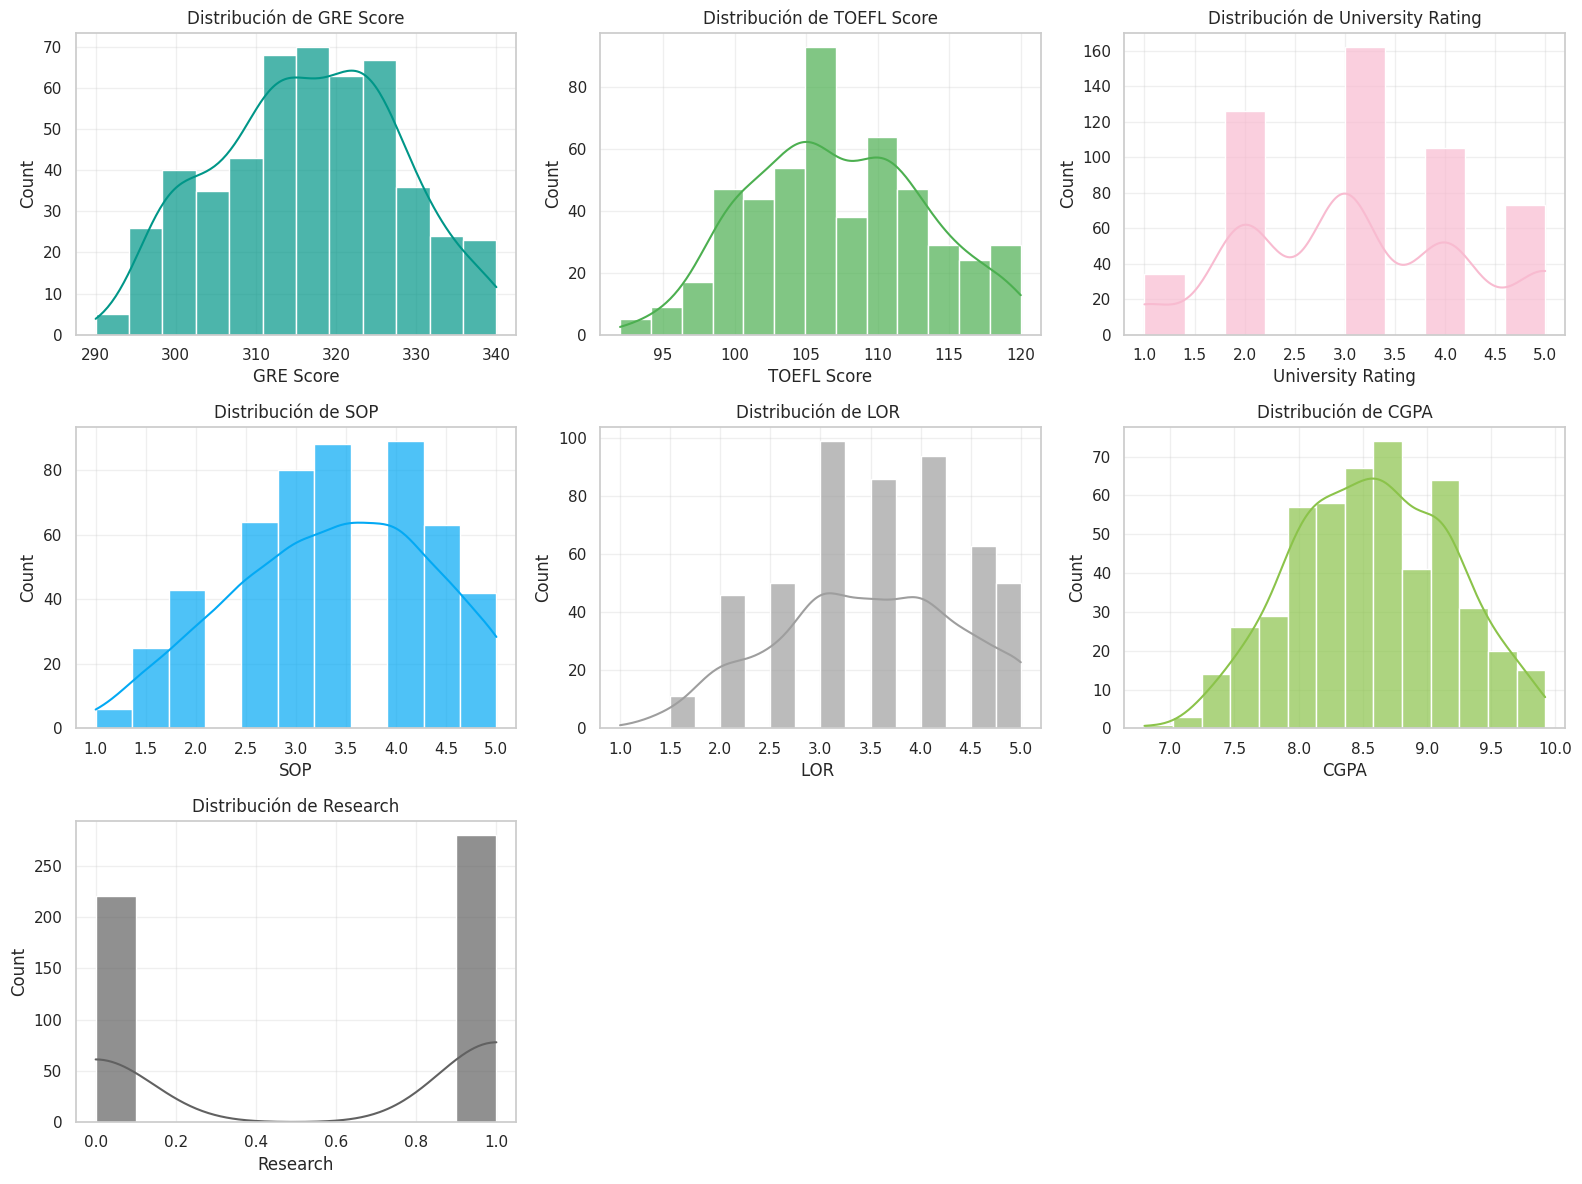

In [ ]:
# 1. Histogramas para cada variable numérica
plt.figure(figsize=(16, 12))
colors = [custom_palette['teal'], custom_palette['green'], custom_palette['pink'],
         custom_palette['light_blue'], custom_palette['gray'], custom_palette['light_green'],
         custom_palette['dark_gray']]

for i, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[column], kde=True, color=color, alpha=0.7)
    plt.title(f'Distribución de {column}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('histogramas_personalizados.png')
plt.show()


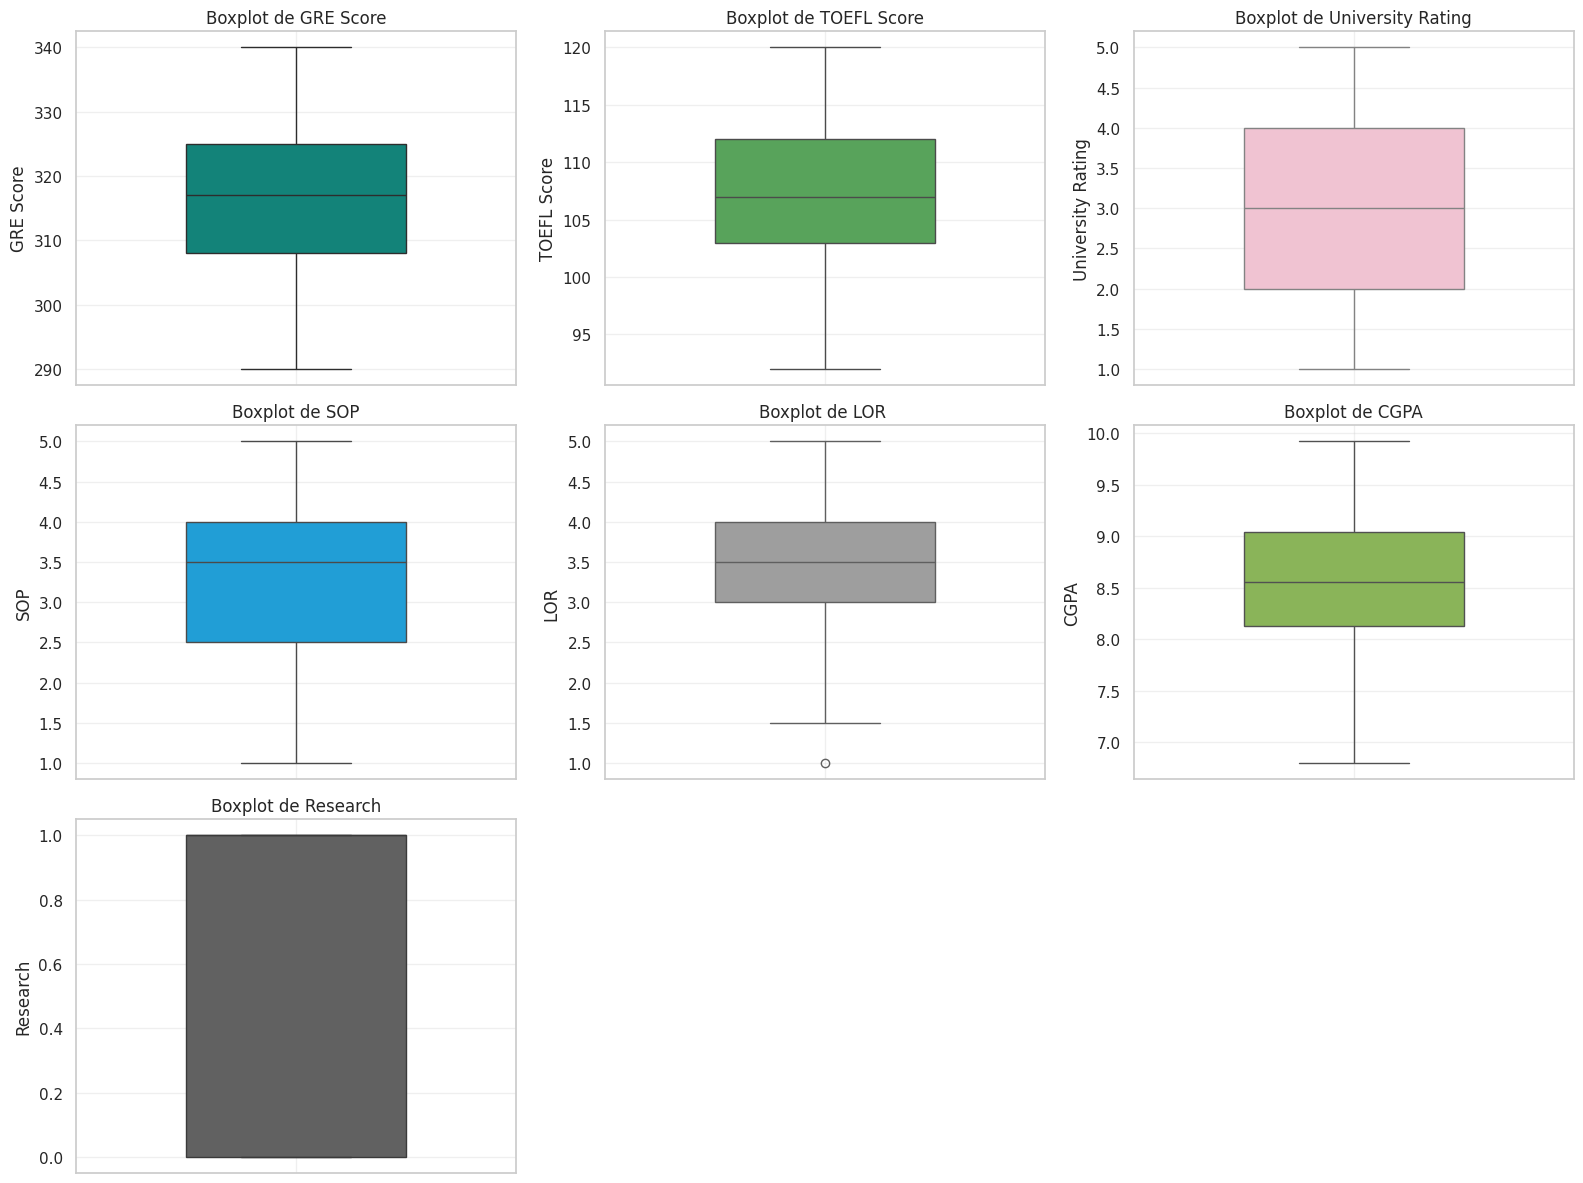

In [ ]:
# 2. Boxplots
plt.figure(figsize=(16, 12))
for i, (column, color) in enumerate(zip(df.columns, colors)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column], color=color, width=0.5)
    plt.title(f'Boxplot de {column}', fontsize=12)
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('boxplots_personalizados.png')
plt.show()

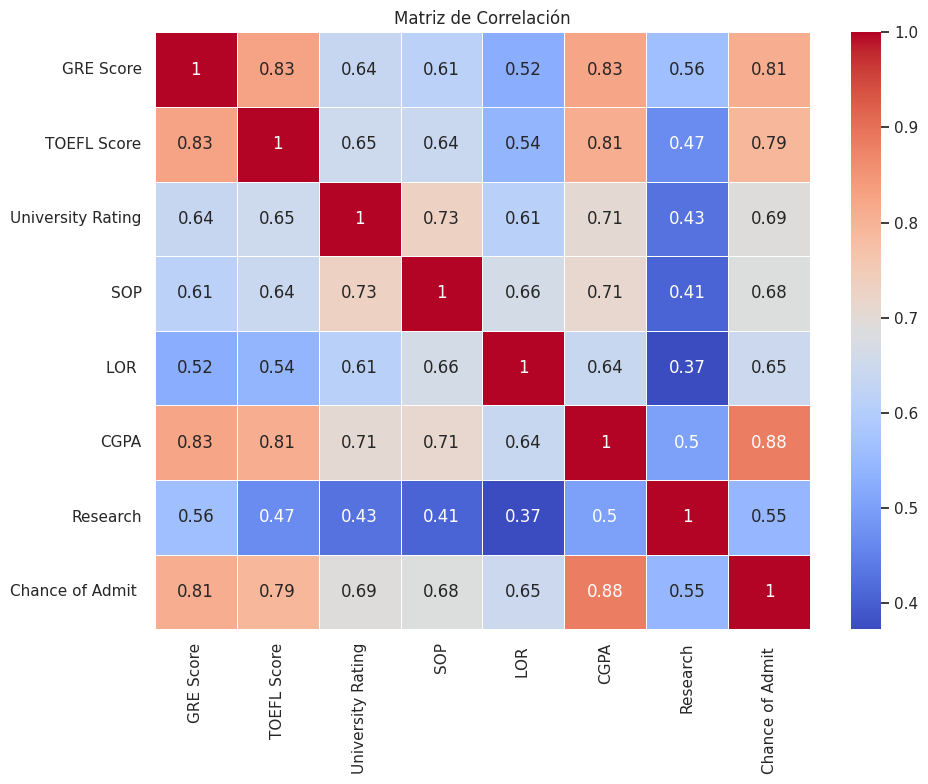

In [ ]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

* Este gráfico muestra la relación entre las variables numéricas del dataset.

* Valores cercanos a 1 indican correlaciones fuertes y positivas, mientras que valores negativos cercanos a -1 indican relaciones inversas.

* Si una variable está altamente correlacionada con la probabilidad de admisión, puede ser una variable importante en el análisis.


<Figure size 1600x1200 with 0 Axes>

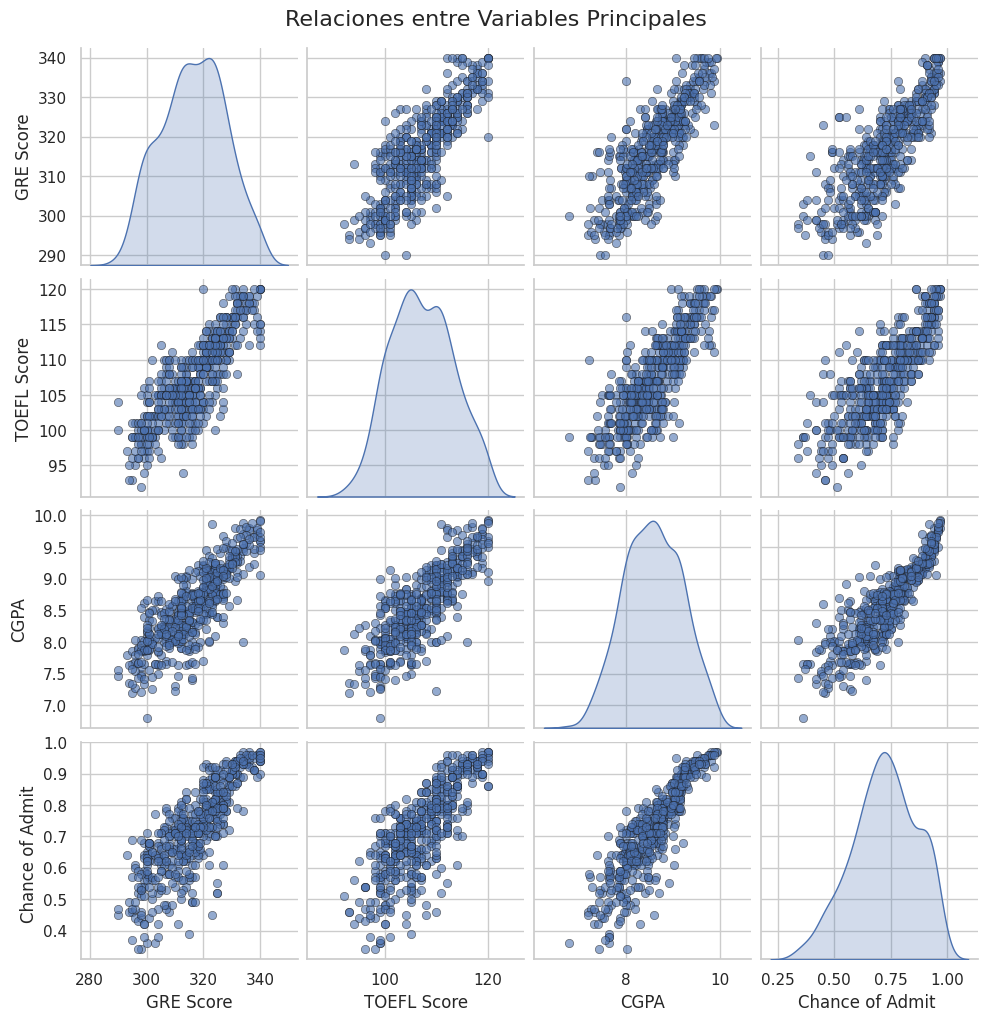

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Verificar si las columnas existen en el DataFrame
missing_cols = [col for col in features if col not in df.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[features],
                 kind='scatter',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'fill': True})

    plt.suptitle('Relaciones entre Variables Principales', y=1.02, fontsize=16)
    plt.savefig('pairplot_personalizado.png')
    plt.show()


1. Existe una correlación positiva fuerte entre todas las variables (cuando una aumenta, las otras también tienden a aumentar)
2. La relación más fuerte parece ser entre CGPA y Chance of Admit, donde se ve una tendencia claramente lineal ascendente
3. La probabilidad de admisión tiene una distribución bimodal (con dos picos), con concentraciones alrededor de 0.75 y 0.95
4. Estudiantes con puntajes más altos en las tres métricas académicas (GRE, TOEFL y CGPA) tienen consistentemente mayores probabilidades de admisión

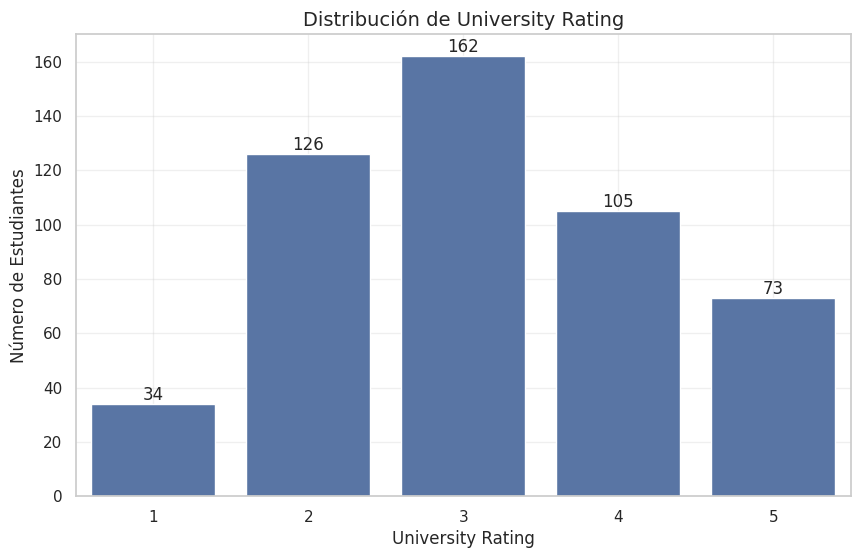

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

ax = sns.countplot(x='University Rating', data=df)

plt.title('Distribución de University Rating', fontsize=14)
plt.xlabel('University Rating')
plt.ylabel('Número de Estudiantes')

# Añadir etiquetas en cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Añadir grid
plt.grid(True, alpha=0.3)

plt.savefig('university_rating_dist.png')
plt.show()

El gráfico muestra que la mayoría de estudiantes en tu conjunto de datos provienen de universidades con rating 3 (133 estudiantes) y rating 2 (107 estudiantes), mientras que hay menos estudiantes de universidades con rating 1, 4 y 5.

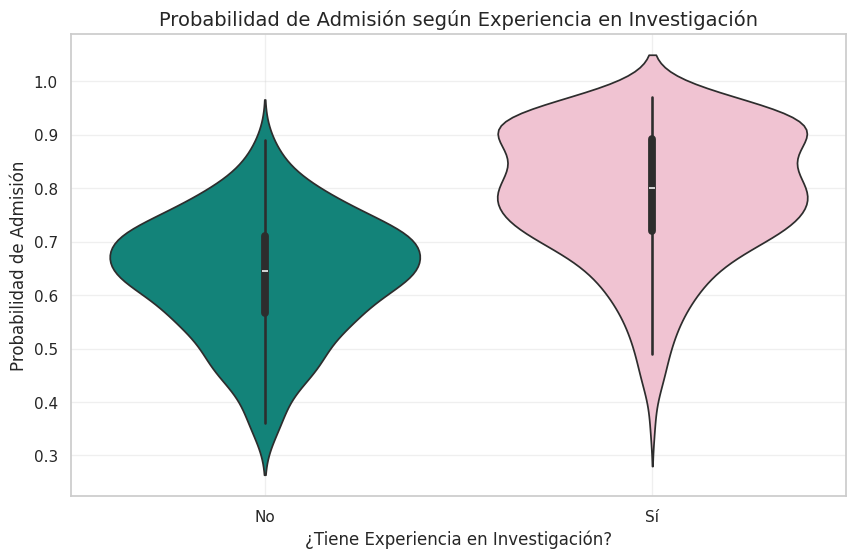

In [ ]:
# 6. Gráfico de violín para 'Chance of Admit' por 'Research'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Research', y='Chance of Admit ', hue='Research', data=df,
              palette=[custom_palette['teal'], custom_palette['pink']], legend=False)
plt.title('Probabilidad de Admisión según Experiencia en Investigación', fontsize=14)
plt.xlabel('¿Tiene Experiencia en Investigación?')
plt.ylabel('Probabilidad de Admisión')
plt.xticks([0, 1], ['No', 'Sí'])
plt.grid(True, alpha=0.3)
plt.savefig('research_vs_admit.png')
plt.show()

Distribución para quienes tienen investigación:

Mediana aproximadamente en 0.8 (línea negra central)
Distribución concentrada entre 0.7 y 0.95
Forma bimodal con mayor concentración en la parte superior
Rango: aproximadamente de 0.3 a 1.0


Distribución para quienes no tienen investigación:

Mediana aproximadamente en 0.65
Distribución más amplia y uniforme entre 0.45 y 0.75
Pequeño pico adicional cerca de 0.9
Rango: aproximadamente de 0.25 a 0.95

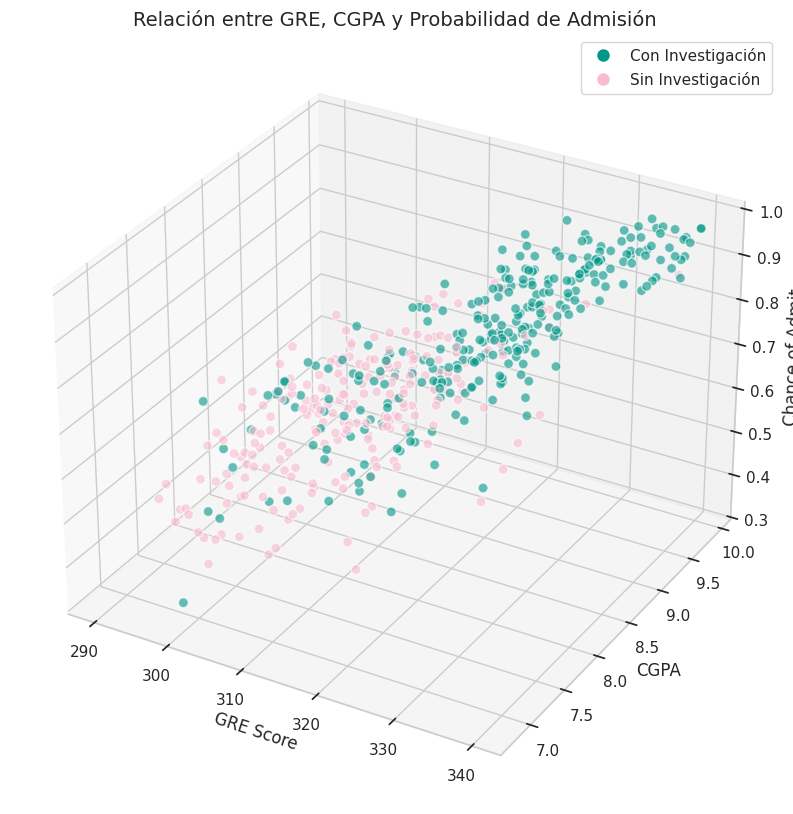

In [ ]:

# 7. Gráfico de dispersión 3D para las variables más importantes
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Seleccionamos variables según la correlación encontrada
x = df['GRE Score']
y = df['CGPA']
z = df['Chance of Admit ']

colors = [custom_palette['teal'] if r == 1 else custom_palette['pink'] for r in df['Research']]

ax.scatter(x, y, z, c=colors, s=50, alpha=0.6, edgecolors='w')
ax.set_xlabel('GRE Score')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance of Admit')
plt.title('Relación entre GRE, CGPA y Probabilidad de Admisión', fontsize=14)

# Añadir leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Con Investigación',
          markerfacecolor=custom_palette['teal'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Sin Investigación',
          markerfacecolor=custom_palette['pink'], markersize=10)
]
ax.legend(handles=legend_elements)

plt.savefig('scatter_3d_personalizado.png')
plt.show()

La visualización muestra claramente una tendencia positiva donde:

A mayor puntuación GRE y mayor CGPA, mayor es la probabilidad de admisión
Los candidatos con experiencia en investigación (puntos verdes) tienden a tener probabilidades de admisión más altas que aquellos sin experiencia en investigación (puntos rosa), incluso con puntuaciones GRE y CGPA similares

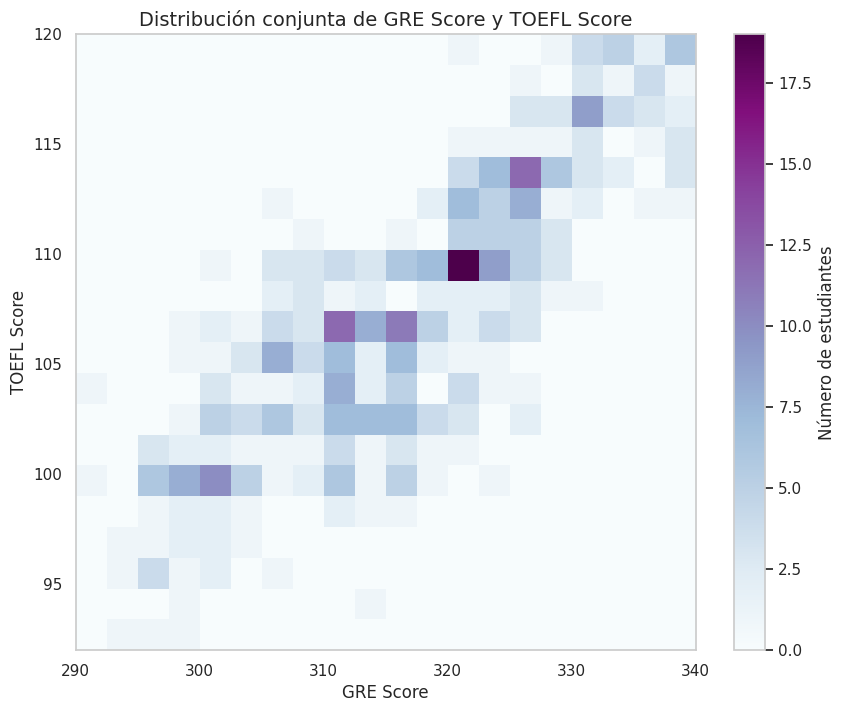

In [ ]:
# 8. Histograma 2D para GRE vs TOEFL
plt.figure(figsize=(10, 8))
x = df['GRE Score']
y = df['TOEFL Score']
plt.hist2d(x, y, bins=20, cmap=plt.cm.BuPu)
plt.colorbar(label='Número de estudiantes')

plt.title('Distribución conjunta de GRE Score y TOEFL Score', fontsize=14)
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.grid(True, alpha=0.3)
plt.savefig('gre_toefl_hist2d.png')
plt.show()

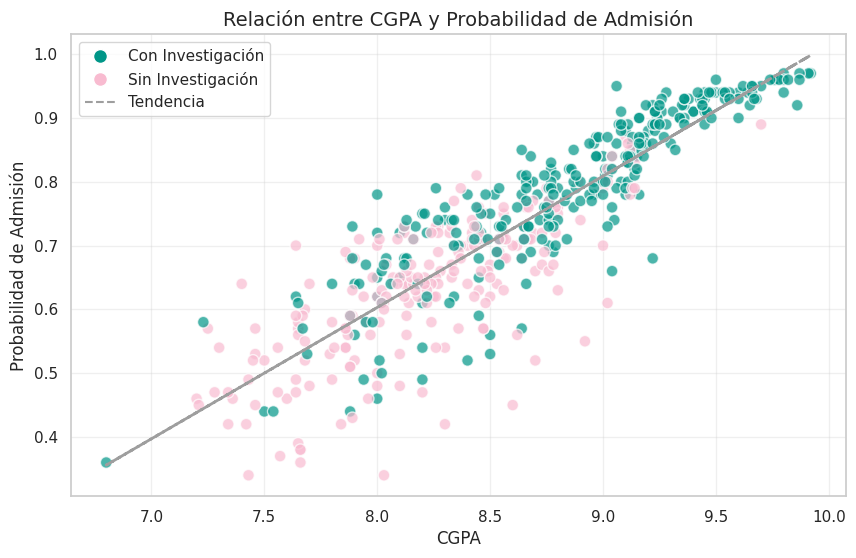

In [ ]:
# 9. Gráfico de dispersión para CGPA vs Chance of Admit
plt.figure(figsize=(10, 6))
plt.scatter(df['CGPA'], df['Chance of Admit '],
            c=[custom_palette['teal'] if r == 1 else custom_palette['pink'] for r in df['Research']],
            alpha=0.7, s=70, edgecolors='w')

# Añadir línea de tendencia
x = df['CGPA']
y = df['Chance of Admit ']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), linestyle='--', color=custom_palette['gray'], linewidth=2)

plt.title('Relación entre CGPA y Probabilidad de Admisión', fontsize=14)
plt.xlabel('CGPA')
plt.ylabel('Probabilidad de Admisión')

# Añadir leyenda
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Con Investigación',
          markerfacecolor=custom_palette['teal'], markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Sin Investigación',
          markerfacecolor=custom_palette['pink'], markersize=10),
    Line2D([0], [0], color=custom_palette['gray'], linestyle='--', label='Tendencia')
]
plt.legend(handles=legend_elements)

plt.grid(True, alpha=0.3)
plt.savefig('cgpa_vs_admit.png')
plt.show()

# ***Escalado de variables***

## StandardScale

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Definir las columnas a escalar
columns_to_scale = ['GRE Score', 'TOEFL Score']

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar el escalado a las columnas seleccionadas
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostrar los datos escalados
print("\nMuestra de datos escalados:")
print(df_scaled.head())


Muestra de datos escalados:
   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0   1.819238     1.778865                  4  4.5   4.5  9.65         1   
1   0.667148    -0.031601                  4  4.0   4.5  8.87         1   
2  -0.041830    -0.525364                  3  3.0   3.5  8.00         1   
3   0.489904     0.462163                  3  3.5   2.5  8.67         1   
4  -0.219074    -0.689952                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  


In [ ]:
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472     0.000
Mediana          317.000     0.047
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.346
Máximo           340.000     2.085

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192     0.000
Mediana          107.000    -0.032
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.500
Máximo           120.000     2.108


In [ ]:
from scipy import stats

# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001


La normalización Standard no logró normalizar los datos

## Power Transformer Yeo-Jhonson

In [ ]:
from sklearn.preprocessing import PowerTransformer
# Aplicar PowerTransformer a todas las columnas numéricas para normalizar
scaler = PowerTransformer(method='yeo-johnson')
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472    -0.000
Mediana          317.000     0.040
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.314
Máximo           340.000     2.110

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192     0.000
Mediana          107.000    -0.008
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.641
Máximo           120.000     2.032


La prueba de Shapiro-Wilk verifica si una muestra proviene de una distribución normal.
p-value bajo (<0.05) indica que es poco probable que los datos sean normales.
p-value alto (>=0.05) indica que los datos podrían seguir una distribución normal.


In [ ]:
# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0002


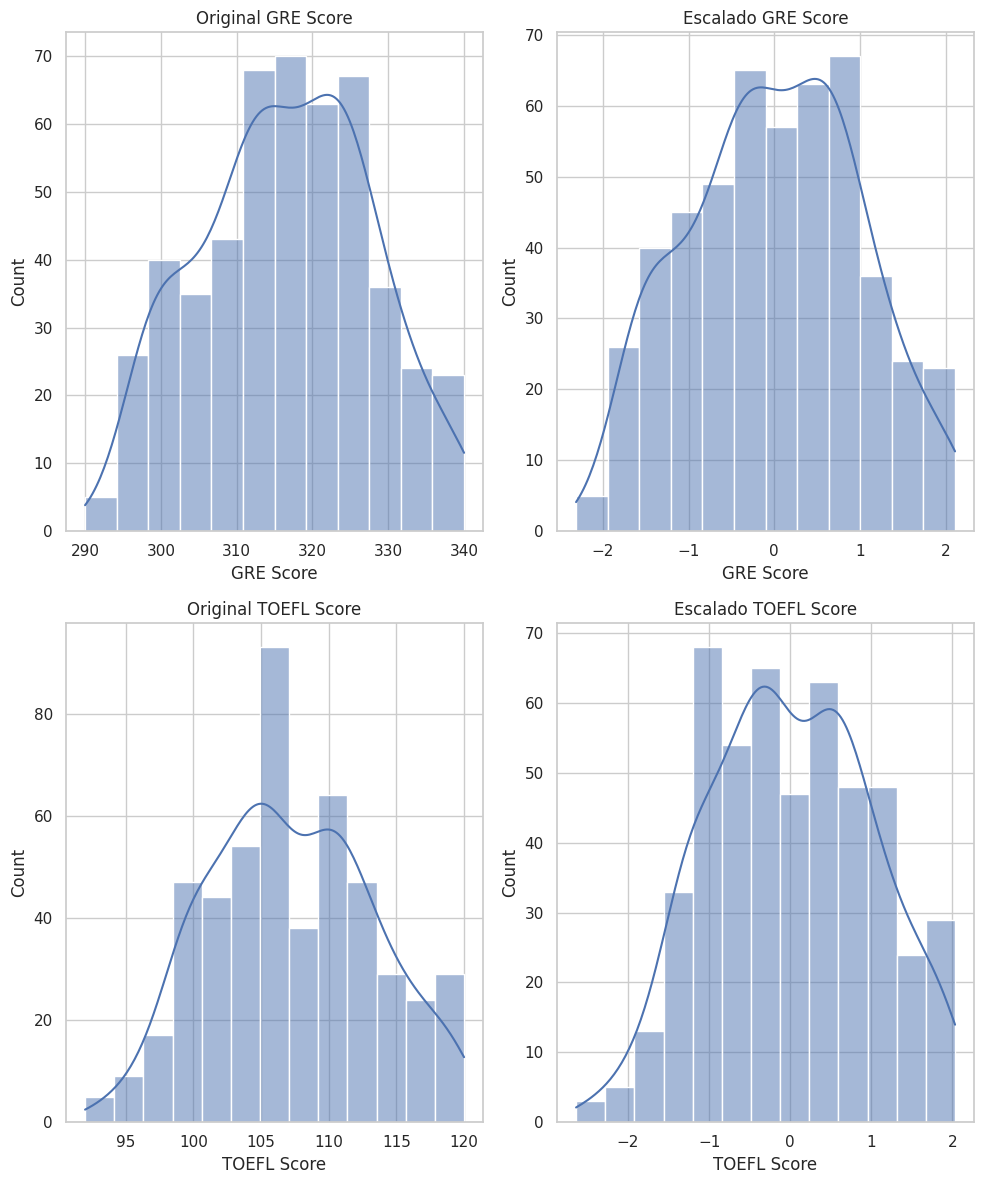

In [ ]:
# Graficar distribuciones antes y después del escalado
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(10, 12))

# Calculate number of rows and columns for the subplots
num_rows = len(columns_to_scale)
num_cols = 2

for i, col in enumerate(columns_to_scale):
    # Calculate the subplot index based on the current row and column
    subplot_index = i * num_cols + 1

    # Plot the original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {col}")

    # Plot the scaled distribution
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Escalado {col}")

plt.tight_layout()
plt.show()

## PowerTranformer Box-Cox

In [ ]:
from sklearn.preprocessing import PowerTransformer
# Aplicar PowerTransformer a todas las columnas numéricas para normalizar
scaler = PowerTransformer(method='box-cox')
df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# Comparación de estadísticas antes y después del escalado
for col in columns_to_scale:
    original_stats = [df[col].mean(), df[col].median(), df[col].std(), df[col].min(), df[col].max()]
    scaled_stats = [df_scaled[col].mean(), df_scaled[col].median(), df_scaled[col].std(), df_scaled[col].min(), df_scaled[col].max()]

    col_comparison = pd.DataFrame({
        'Original': original_stats,
        'Escalado': scaled_stats
    }, index=['Media', 'Mediana', 'Desv. Estándar', 'Mínimo', 'Máximo'])

    print(f"\nEstadísticas para {col}:")
    print(col_comparison.round(3))


Estadísticas para GRE Score:
                Original  Escalado
Media            316.472    -0.000
Mediana          317.000     0.040
Desv. Estándar    11.295     1.001
Mínimo           290.000    -2.314
Máximo           340.000     2.110

Estadísticas para TOEFL Score:
                Original  Escalado
Media            107.192    -0.000
Mediana          107.000    -0.008
Desv. Estándar     6.082     1.001
Mínimo            92.000    -2.642
Máximo           120.000     2.032


In [ ]:
# Prueba de normalidad antes y después del escalado
for col in columns_to_scale:
    original_shapiro = stats.shapiro(df[col])
    scaled_shapiro = stats.shapiro(df_scaled[col])

    print(f"Prueba de normalidad para {col}:")
    print(f"  - Original: p-value = {original_shapiro.pvalue:.4f}")
    print(f"  - Escalado (PowerTransformer): p-value = {scaled_shapiro.pvalue:.4f}")

Prueba de normalidad para GRE Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0001
Prueba de normalidad para TOEFL Score:
  - Original: p-value = 0.0001
  - Escalado (PowerTransformer): p-value = 0.0002


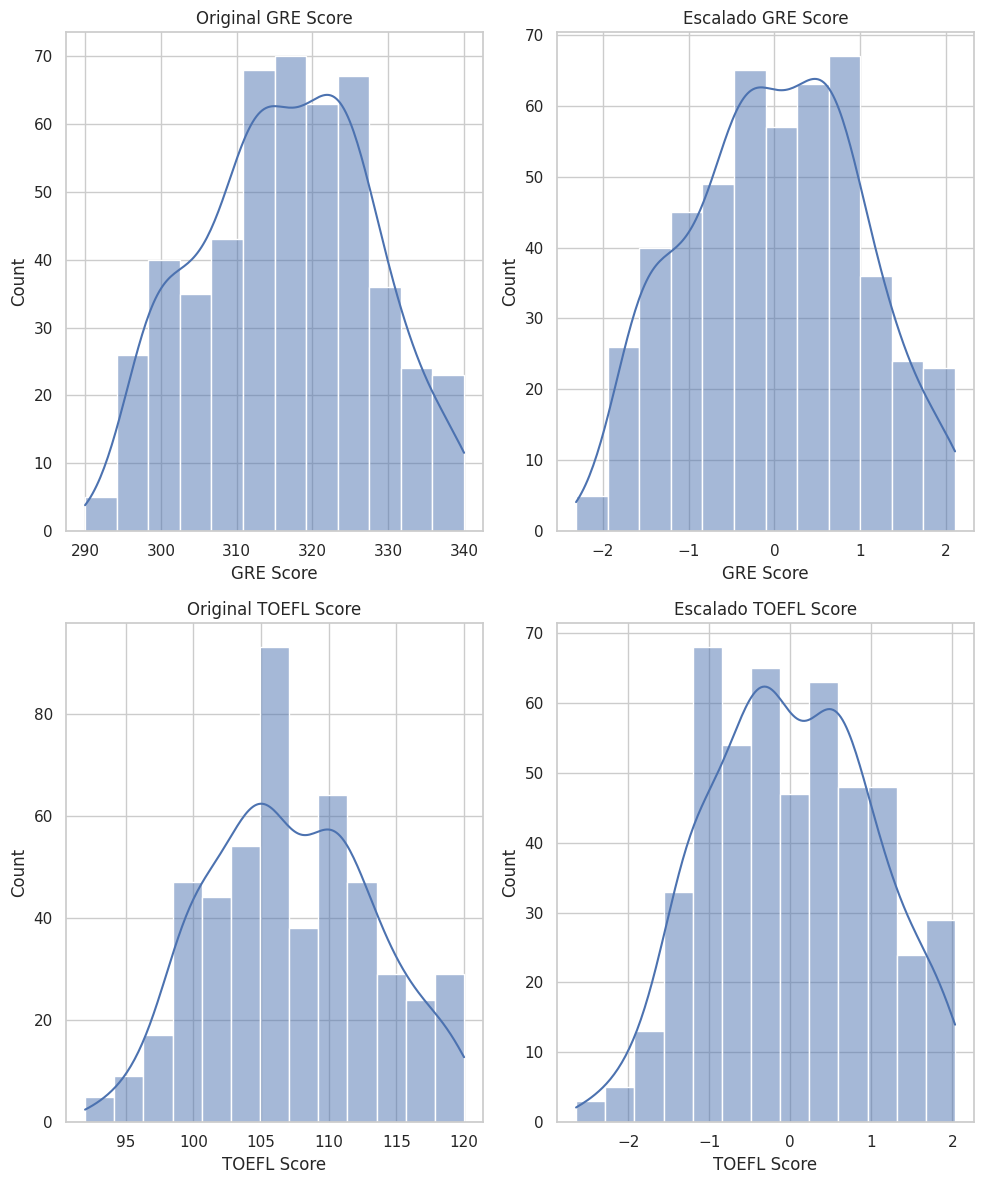

In [ ]:
# Graficar distribuciones antes y después del escalado
fig, axes = plt.subplots(len(columns_to_scale), 2, figsize=(10, 12))

# Calculate number of rows and columns for the subplots
num_rows = len(columns_to_scale)
num_cols = 2

for i, col in enumerate(columns_to_scale):
    # Calculate the subplot index based on the current row and column
    subplot_index = i * num_cols + 1

    # Plot the original distribution
    sns.histplot(df[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f"Original {col}")

    # Plot the scaled distribution
    sns.histplot(df_scaled[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f"Escalado {col}")

plt.tight_layout()
plt.show()

# ***Estrategias de tratamiento de datos***

##Tratamiento de Outliers

El dataset presenta muchos outliers, por lo que se utiliza la distancia de Mahalanobis para eliminarlos.

In [ ]:
X = df.select_dtypes(include=[np.number]).values
mcd = MinCovDet().fit(X)
mahal_dist = mcd.mahalanobis(X)
p = X.shape[1]
threshold = chi2.ppf(0.975, df=p)
df_mahal = pd.DataFrame({'disMahalanobis': mahal_dist})

outliers = df_mahal[ df_mahal['disMahalanobis'] > threshold ]

print("Outliers encontrados:")
print(outliers)

df_wo_outliers = df.drop(outliers.index)
print("\nDataset sin outliers:")
print(df_wo_outliers)


Outliers encontrados:
     disMahalanobis
9         61.257356
10        41.074022
13        17.591401
15        18.202500
21        19.589254
..              ...
465       27.298998
467       17.718603
483       28.938969
492       32.262310
493       21.524686

[79 rows x 1 columns]

Dataset sin outliers:
     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   

<Figure size 1600x1200 with 0 Axes>

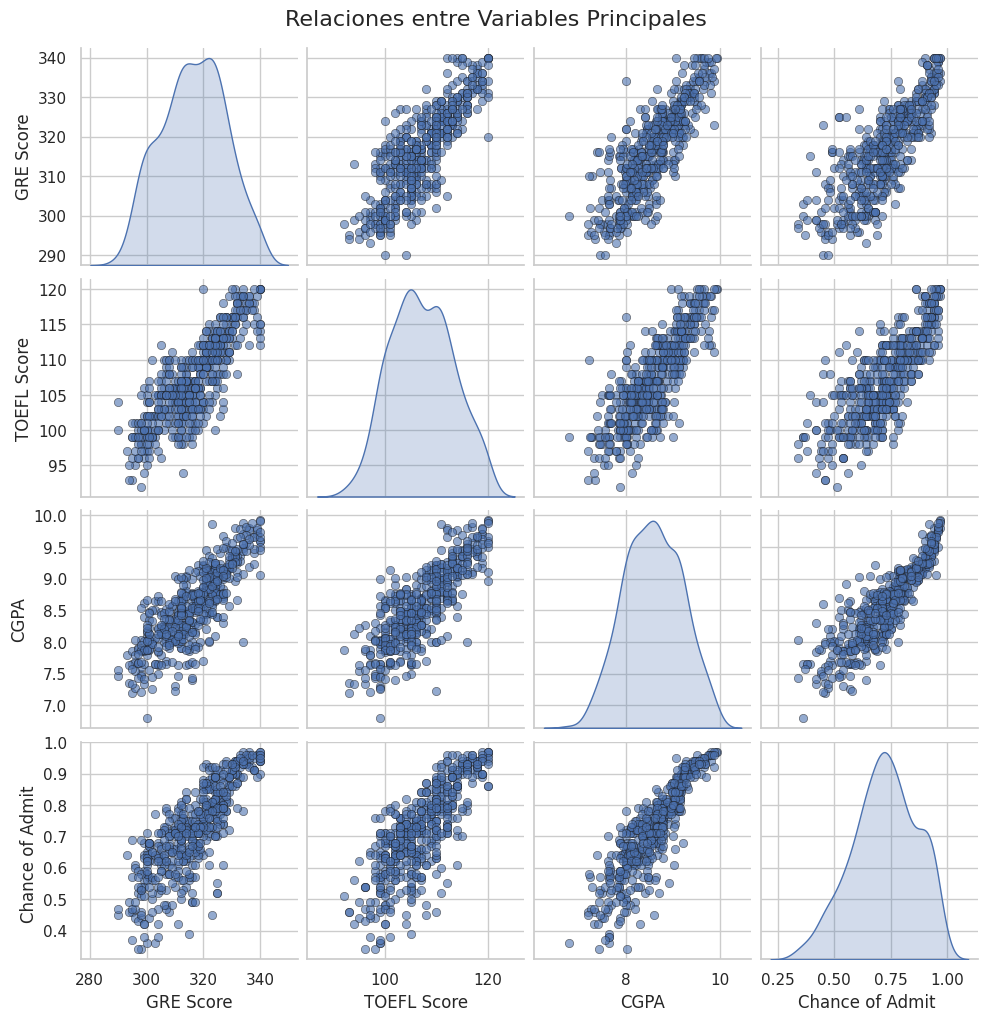

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las variables
features = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

# Verificar si las columnas existen en el DataFrame
missing_cols = [col for col in features if col not in df_wo_outliers.columns]
if missing_cols:
    print(f"Columnas faltantes en el DataFrame: {missing_cols}")
else:
    plt.figure(figsize=(16, 12))
    sns.pairplot(df[features],
                 kind='scatter',
                 diag_kind='kde',
                 plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
                 diag_kws={'fill': True})

    plt.suptitle('Relaciones entre Variables Principales', y=1.02, fontsize=16)
    plt.savefig('pairplot_personalizado.png')
    plt.show()


In [ ]:
y = df_wo_outliers[['Chance of Admit ']].rename(columns={'Chance of Admit ': 'target'})
X = df_wo_outliers.drop('Chance of Admit ', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ***Entrenamiento de modelos***

Se utilizará random forest y XGBoost como modelos para obtener la probabilidad.

#Regresión multivariable

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mejores hiperparámetros para RandomForestRegressor:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}

Mejores hiperparámetros para XGBRegressor:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}

Validación Cruzada RandomForestRegressor
MSE promedio:  0.0017162588413601892
MAE promedio:  0.03136118369014963
R2 promedio:  0.8810801162694697

Validación Cruzada XGBRegressor
MSE promedio:  0.0016534177353605627
MAE promedio:  0.03148207999765873
R2 promedio:  0.8850821733474732

Evaluación de Modelos en Test

Resultados para RandomForestRegressor:
  MSE: 0.0019
  MAE: 0.0328
  R2: 0.8823

Resultados para XGBRegressor:
  MSE: 0.0019
  MAE: 0.0317
  R2: 0.8862


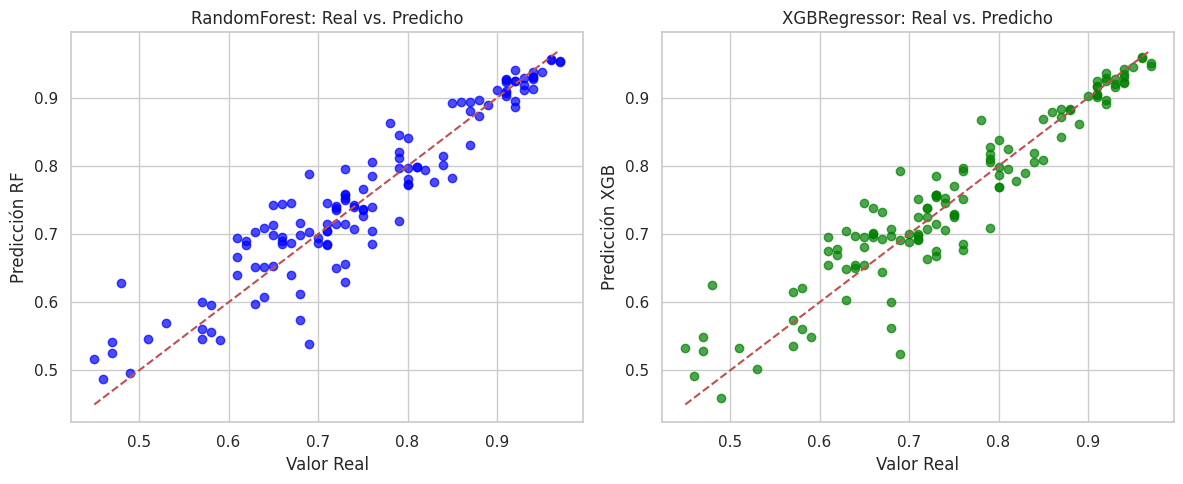

In [ ]:
# Grid Search para RandomForestRegressor
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_reg = RandomForestRegressor(random_state=42)
grid_search_random_forest = GridSearchCV(random_forest_reg, param_grid=param_grid_random_forest, cv=5,
                              scoring='r2', n_jobs=-1)
grid_search_random_forest.fit(X_train, y_train.values)

best_random_forest = grid_search_random_forest.best_estimator_
y_pred_random_forest = best_random_forest.predict(X_test)

print("Mejores hiperparámetros para RandomForestRegressor:")
print(grid_search_random_forest.best_params_)


# Grid Search para XGBRegressor

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

xgb_reg = XGBRegressor(random_state=42, objective='reg:squarederror')
grid_search_xgb = GridSearchCV(xgb_reg, param_grid=param_grid_xgb, cv=5,
                               scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train.values)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\nMejores hiperparámetros para XGBRegressor:")
print(grid_search_xgb.best_params_)


# Validación Cruzada con cross_validation

scoring = {
    'mse': 'neg_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'r2': 'r2'
}

cv_results_random_forest = cross_validate(best_random_forest, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)
cv_results_xgb = cross_validate(best_xgb, X_train, y_train, cv=5, scoring=scoring, n_jobs=-1)

print("\nValidación Cruzada RandomForestRegressor")
print("MSE promedio: ", -np.mean(cv_results_random_forest['test_mse']))
print("MAE promedio: ", -np.mean(cv_results_random_forest['test_mae']))
print("R2 promedio: ", np.mean(cv_results_random_forest['test_r2']))

print("\nValidación Cruzada XGBRegressor")
print("MSE promedio: ", -np.mean(cv_results_xgb['test_mse']))
print("MAE promedio: ", -np.mean(cv_results_xgb['test_mae']))
print("R2 promedio: ", np.mean(cv_results_xgb['test_r2']))


# Evaluación en el conjunto de prueba

def evaluar_modelo(y_true, y_pred, modelo):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\nResultados para {modelo}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R2: {r2:.4f}")
    return mse, mae, r2

print("\nEvaluación de Modelos en Test")
evaluar_modelo(y_test, y_pred_random_forest, "RandomForestRegressor")
evaluar_modelo(y_test, y_pred_xgb, "XGBRegressor")


# Gráfico para comparar modelos

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_random_forest, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Predicción RF")
plt.title("RandomForest: Real vs. Predicho")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Predicción XGB")
plt.title("XGBRegressor: Real vs. Predicho")

plt.tight_layout()
plt.show()


## Clasificación

El usuario además de obtener la probabilidad de admisión, podrá saber si esa universidad es:

1. Safe School (Universidad segura o alcanzable) 80-100%.
2. Target School (Probabilidad moderada de admisión) 50%-80%
3. Reach School (Universidad de riesgo de ser admitido). (0%-50%)

In [ ]:
df_random_forest = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
df_random_forest['y_pred_random_forest'] = y_pred_random_forest

df_xgb = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)
df_xgb['y_pred_xgb'] = y_pred_xgb

rangos = [0, 0.5, 0.8, 1]
labels = ['Baja', 'Media', 'Alta']

df_random_forest['target_category_expected'] = pd.cut(df_random_forest['target'],
                                 bins=rangos,
                                 labels=labels)

df_random_forest['target_category_predicted'] = pd.cut(df_random_forest['y_pred_random_forest'],
                                 bins=rangos,
                                 labels=labels)

df_xgb['target_category_expected'] = pd.cut(df_xgb['target'],
                                 bins=rangos,
                                 labels=labels)

df_xgb['target_category_predicted'] = pd.cut(df_xgb['y_pred_xgb'],
                                 bins=rangos,
                                 labels=labels)

df_random_forest.sort_values(by='target_category_expected', ascending=False, inplace=True)
df_xgb.sort_values(by='target_category_expected', ascending=False, inplace=True)

In [ ]:
# Evaluación de clasificación para Random Forest:
#accuracy
print("Metricas de evaluación para RandomForest:\n")
accuracy_random_forest = accuracy_score(df_random_forest['target_category_expected'], df_random_forest['target_category_predicted'])
print("Accuracy:", accuracy_random_forest)
#F1 score
f1_random_forest = f1_score(df_random_forest['target_category_expected'], df_random_forest['target_category_predicted'], average='macro')
print("F1 Score:", f1_random_forest)

#Matriz de confusión
conf_matrix_random_forest = confusion_matrix(df_random_forest['target_category_expected'], df_random_forest['target_category_predicted'])
print("Matriz de confusión:\n", conf_matrix_random_forest)

print()
# Para XGBoost:

#accuracy
print("Metricas de evaluación para XGBoost:\n")
accuracy_xgb = accuracy_score(df_xgb['target_category_expected'], df_xgb['target_category_predicted'])
print("Accuracy:", accuracy_xgb)

#F1 score
f1_xgb = f1_score(df_xgb['target_category_expected'], df_xgb['target_category_predicted'], average='macro')
print("F1 Score:", f1_xgb)

#Matriz de confusión
conf_matrix_xgb = confusion_matrix(df_xgb['target_category_expected'], df_xgb['target_category_predicted'])
print("Matriz de confusión:\n", conf_matrix_xgb)


Metricas de evaluación para RandomForest:

Accuracy: 0.8818897637795275
F1 Score: 0.7577628133183688
Matriz de confusión:
 [[35  0  5]
 [ 0  2  4]
 [ 6  0 75]]

Metricas de evaluación para XGBoost:

Accuracy: 0.8976377952755905
F1 Score: 0.7706038879444157
Matriz de confusión:
 [[37  0  3]
 [ 0  2  4]
 [ 6  0 75]]


# Conclusión

Ambos modelos dieron resultados similares y con altas métricas. Utilizaremos el Random Forest para presentar al usuario los resultados porque es ligeramente mejor.

In [ ]:
joblib.dump(best_random_forest, "modelo_admision.pkl")

['modelo_admision.pkl']